   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
(200, 5)
       CustomerID         Age  Annual_income  Spending_score
count  200.000000  200.000000     200.000000      200.000000
mean   100.500000   38.850000      60.560000       50.200000
std     57.879185   13.969007      26.264721       25.823522
min      1.000000   18.000000      15.000000        1.000000
25%     50.750000   28.750000      41.500000       34.750000
50%    100.500000   36.000000      61.500000       50.000000
75%    150.250000   49.000000      78.000000       73.000000
max    200.000000   70.000000     137.000000       99.000000
<class 'pandas.c

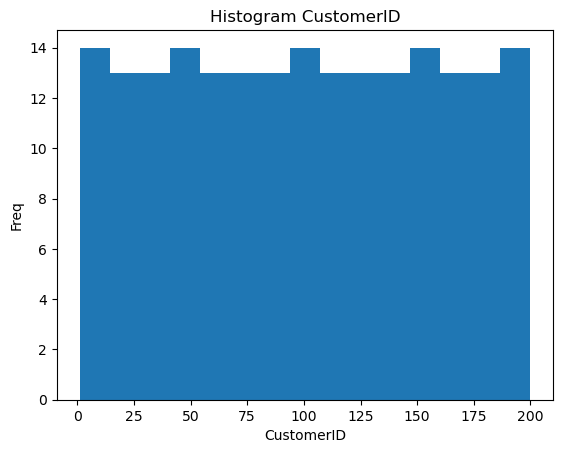

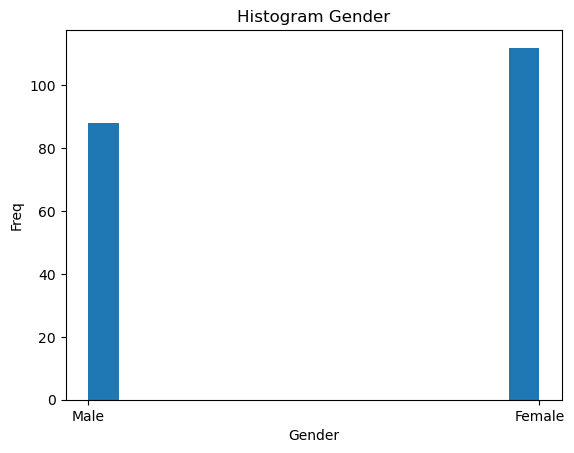

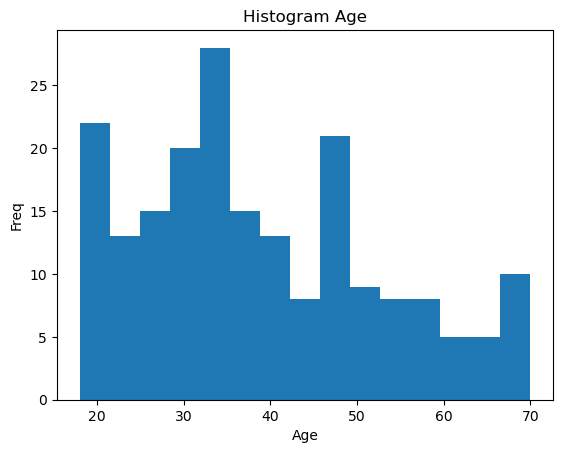

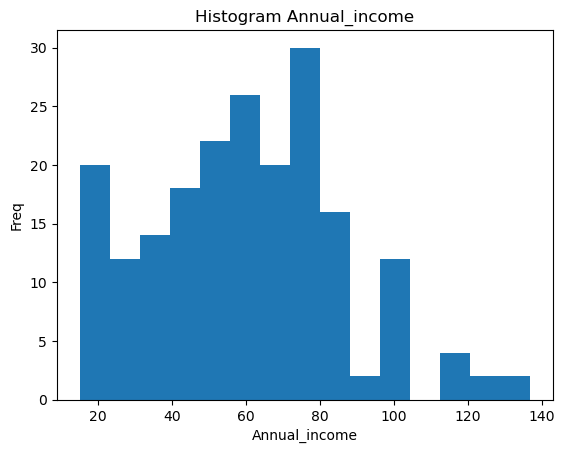

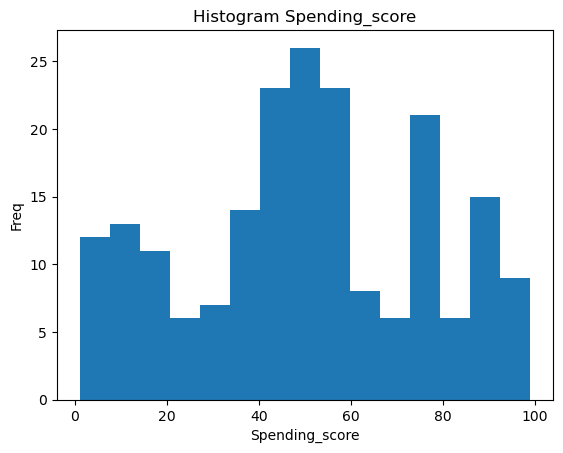

C:\Users\pc\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


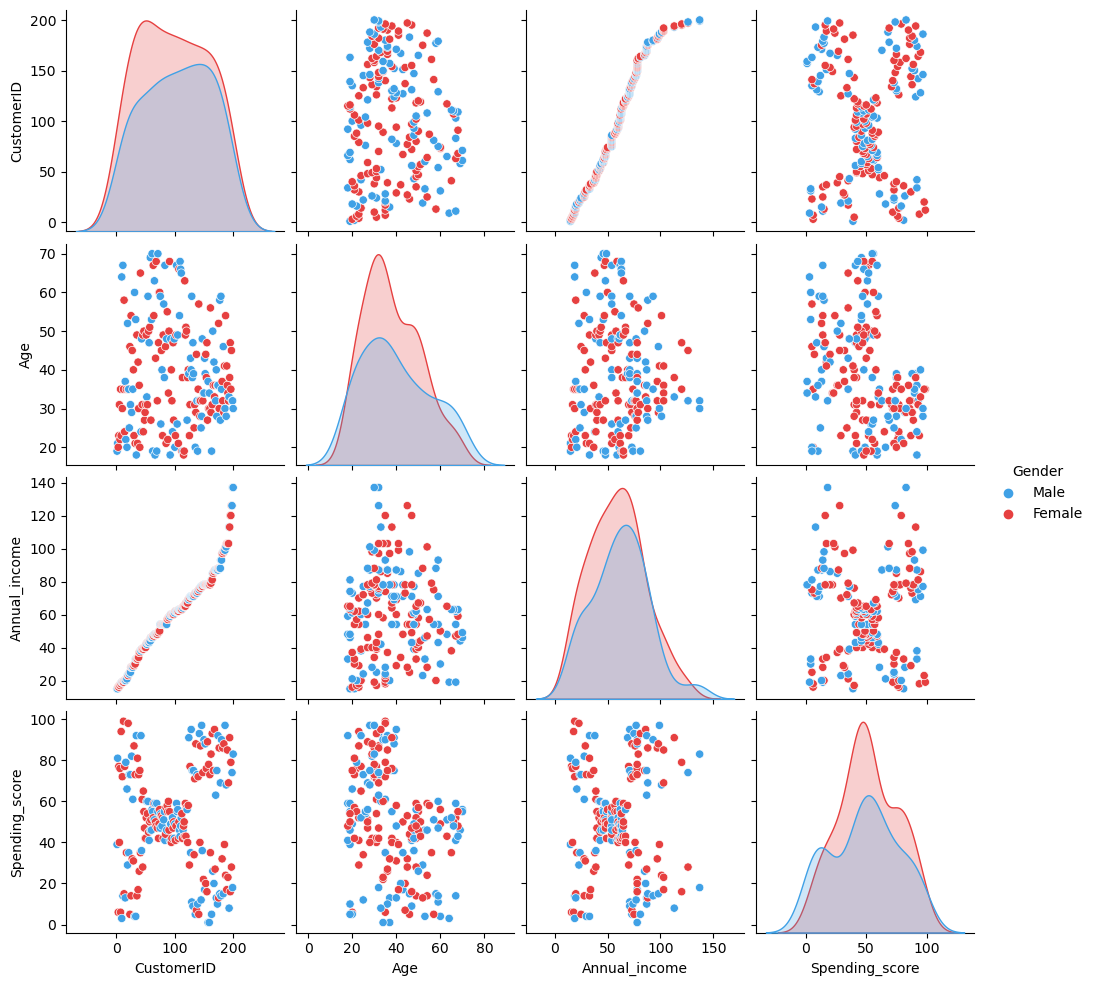

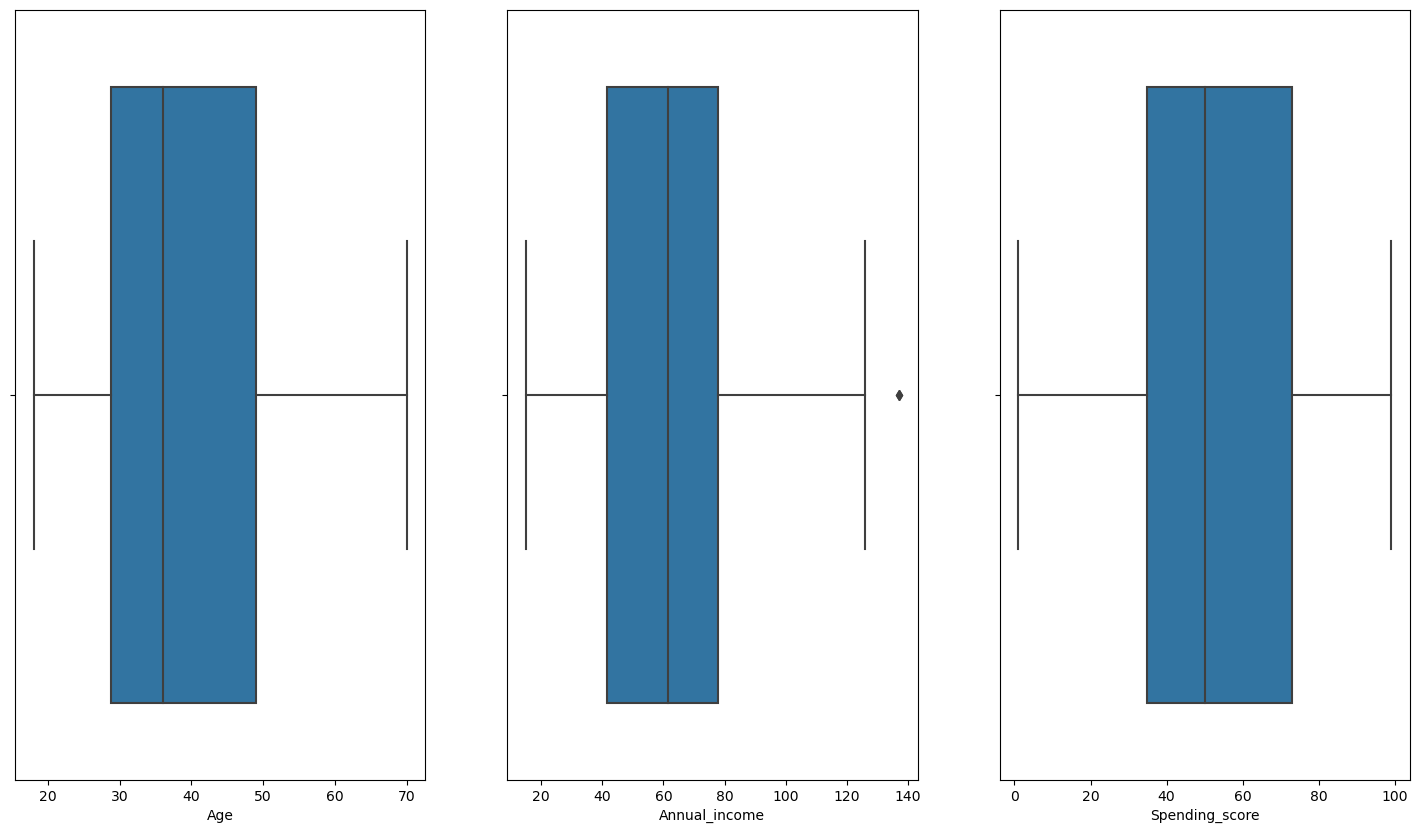

   Gender  Age  Annual_income  Spending_score
0       1   19             15              39
1       1   21             15              81
2       0   20             16               6
3       0   23             16              77
4       0   31             17              40


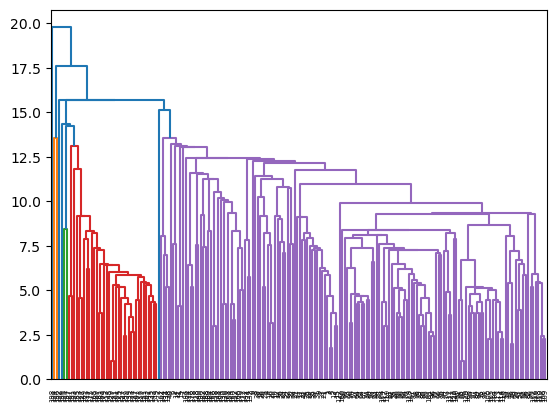

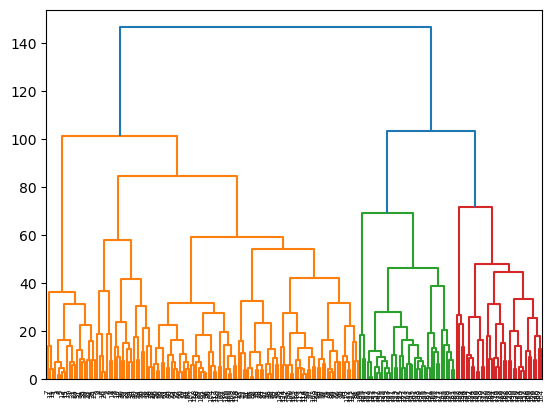

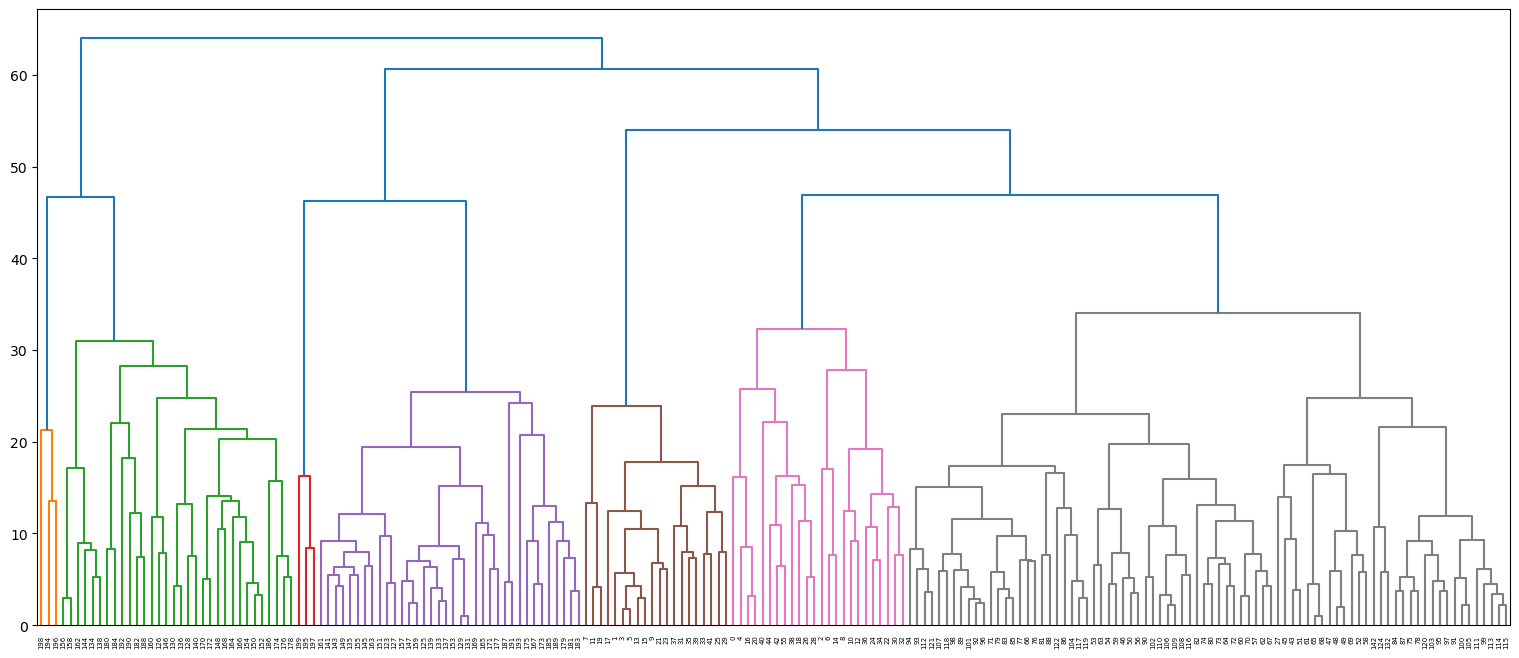

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
   Gender  Age  Annual_income  Spending_score  Cluster_Labels
0       1   19             15              39               0
1       1   21             15              81               0
2       0   20             16               6               0
3       0   23             16              77               0
4       0   31             17              40               0


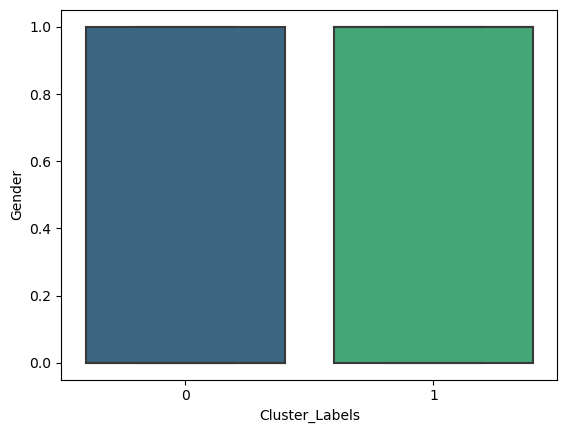

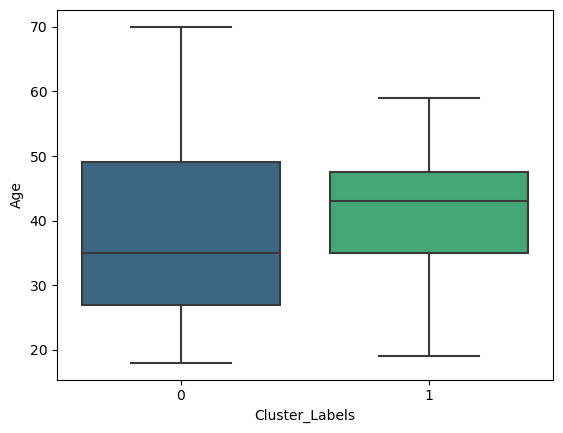

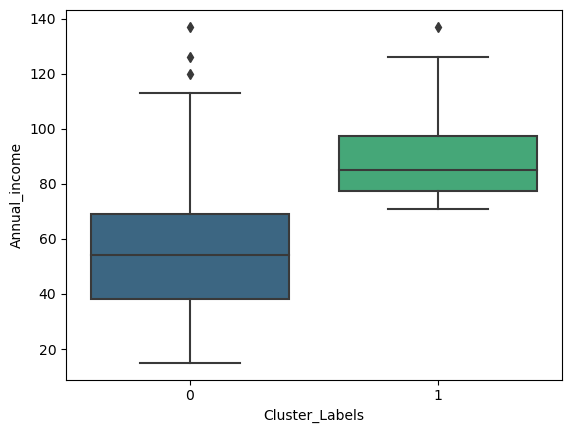

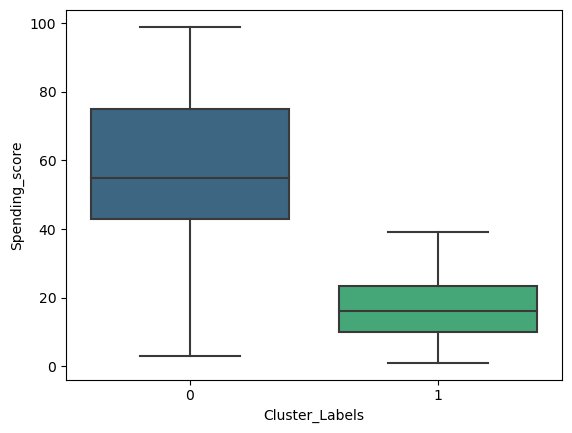

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import required libraries for clustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
#Load dataset
df=pd.read_csv('Mall_Customers.csv')
# first five row
print(df.head())
# size of datset
print(df.shape)
# change column name
df.rename(columns={'Annual Income (k$)': 'Annual_income','Spending Score (1-100)':'Spending_score'},inplace=True)
# statistical summary of numerical variables where we use  linkage functions
print(df.describe())
# summary about dataset
print(df.info())
#plt.pie(df['Gender'].value_counts(), labels=df['Gender'].unique(), autopct='%1.1f%%')
#plt.show()
# check for missing values df.isna().sum()
#plt.pie(df['Gender'].value_counts(), labels=df['Gender'].unique(), autopct='%1.1f%%')
#plt.show()
cols=df
for col in cols:
 plt.hist(df[col],bins=15)
 plt.title('Histogram ' + col)
 plt.xlabel(col)
 plt.ylabel('Freq')
 plt.show()

# noinspection PyUnresolvedReferences
sns.pairplot(df, kind='scatter', hue='Gender', palette=('#40a1e6', '#e64040'))
plt.show()

fig1 = plt.figure(figsize=(18, 10))
ax1 = fig1.add_subplot(131)
sns.boxplot(data=df, x='Age', ax=ax1)
ax2 = fig1.add_subplot(132)
sns.boxplot(data=df, x='Annual_income', ax=ax2)
ax3 = fig1.add_subplot(133)
sns.boxplot(data=df, x='Spending_score', ax=ax3)
plt.show()
#Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
# copy data
new_df = df.copy()
# drope customer id
new_df = new_df.drop('CustomerID', axis=1)
# view data after scaling
print(new_df.head())# Single linkage
mergings = linkage(new_df, method="single", metric='euclidean')
# diagram
dendrogram(mergings)
plt.show()

# Single linkage
mergings = linkage(new_df, method="complete", metric='euclidean')
# diagram
dendrogram(mergings)
plt.show()
# figure size
plt.figure(figsize=(19,8))
# Single linkage
mergings = linkage(new_df, method="average", metric='euclidean')
# diagram
dendrogram(mergings)
plt.show()
# 2 clusters
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
cluster_labels = cut_tree(mergings, n_clusters=2).reshape(-1, )
print(cluster_labels)
# Assign cluster labels
new_df['Cluster_Labels'] = cluster_labels
print(new_df.head())
# Plot Cluster Id vs Spending_score
for cols in new_df.columns[:-1].to_list():
 sns.boxplot(y=cols, x='Cluster_Labels', data=new_df,palette='viridis')
 plt.show()